# **Textual Data Analysis - Exercise - 3**


---


## **Name: Ayesha Zafar**
## **Date: 28/01/2025**


---


###**Translation mining**
In this exercise you will test comparing two texts:

The Finnish translation of the Adventures of Huckleberry Finn (the whole book)
A small section of the English original
In the exercise you should convince yourself that the cross-lingual embedding models can indeed identify the area where the texts match. You can do so by splitting the texts into small overlapping segments, embedding each using a cross-lingual model, comparing the embeddings all against all with cosine similarity, and plotting the results as a heatmap. When splitting the texts, a 2000-character long sliding window with stride of 500 characters worked for me, so you can use that as a reasonable default. The result should look something like the image below. You can clearly see the line where the English text matches the Finnish text. Your job is to replicate this result. :)

For this to work, I suggest you use the model named paraphrase-xlm-r-multilingual-v1 in the Sentence Transformer library. Most likely you will want to use GPU, but do protect your Colab quota and debug your code on a small sample using CPU while developing, and only switch to GPU when ready to run the whole thing.

The English text: https://www.gutenberg.org/ebooks/7104.txt.utf-8
The Finnish text: https://www.gutenberg.org/ebooks/47095.txt.utf-8


---



Step 1. Importing necessary libraries

In [2]:
import requests
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import numpy as np

Step 2. Downloading texts from given links and fetching content of texts

In [3]:
english_url = "https://www.gutenberg.org/ebooks/7104.txt.utf-8"
finnish_url = "https://www.gutenberg.org/ebooks/47095.txt.utf-8"

english_text = requests.get(english_url).text
finnish_text = requests.get(finnish_url).text

Step 3. Spliting texts with window size 2000 and stride 500.
(split_text function splits a given text into overlapping segments using a sliding window approach)

In [4]:
def split_text(text, window_size=2000, stride=500):
    segments = []
    for i in range(0, len(text) - window_size + 1, stride):
        segment = text[i:i + window_size]
        segments.append(segment)
    return segments

# Creating overlapping segments for english and finnish texts
english_segments = split_text(english_text)
finnish_segments = split_text(finnish_text)

Step 4. Loading the pre-trained 'paraphrase-xlm-r-multilingual-v1' model from SentenceTransformer. This model generates embeddings that are cross-lingual.

In [5]:
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Step 5. Generating embeddings for text segments.
The model encodes each text segment into a high-dimensional vector.

In [6]:
english_embeddings = model.encode(english_segments)
finnish_embeddings = model.encode(finnish_segments)

Step 6. Computing cosine similarity

In [7]:
similarity_matrix = cosine_similarity(english_embeddings, finnish_embeddings)
print(similarity_matrix)

[[0.9439194  0.41591293 0.24576594 ... 0.4599682  0.35274655 0.3327202 ]
 [0.46511158 0.73900163 0.44936314 ... 0.23124146 0.13884656 0.14331016]
 [0.06387816 0.00502119 0.12820567 ... 0.03168712 0.13237774 0.12057052]
 ...
 [0.4447869  0.22654971 0.23961289 ... 0.977422   0.6348032  0.5300412 ]
 [0.399744   0.11675264 0.22914574 ... 0.629079   0.95386404 0.75100684]
 [0.3313083  0.10101042 0.18572004 ... 0.53333354 0.6578125  0.9887519 ]]


Step 7. Plotting heatmap

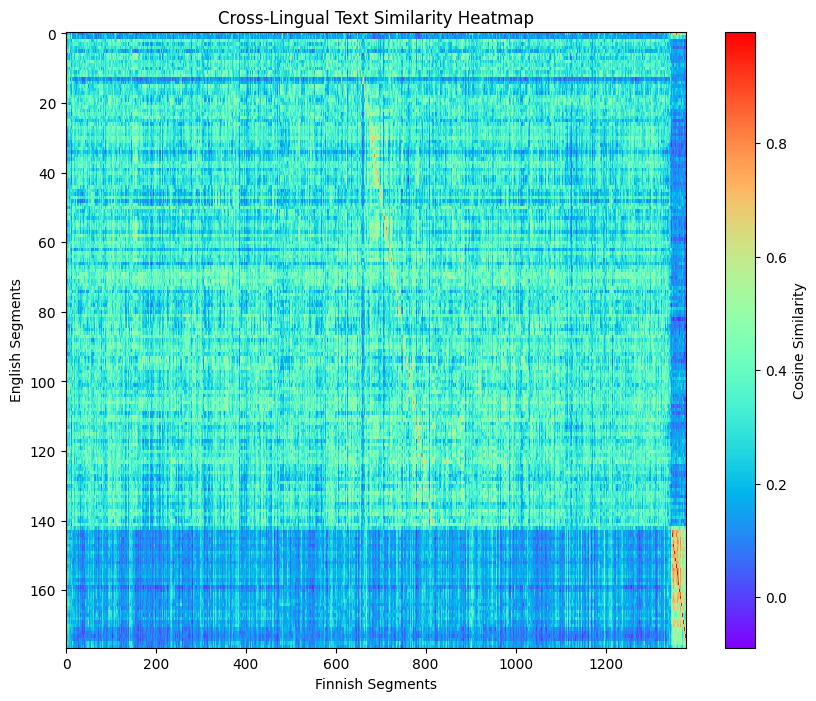

In [8]:
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='rainbow', interpolation='nearest', aspect='auto')
plt.colorbar(label='Cosine Similarity')
plt.xlabel('Finnish Segments')
plt.ylabel('English Segments')
plt.title('Cross-Lingual Text Similarity Heatmap')
plt.show()